### This notebook is dedicated to classifying trajectories

In [12]:
import os
import glob
import numpy as np
from platform import system as OS
import pandas as pd
import scipy.stats
import math
import datetime
from copy import deepcopy
from IPython.display import clear_output, display, HTML, Image
import matplotlib.cm as cm
import warnings
warnings.filterwarnings("ignore")
import sys
import pickle
import time
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import mlab
from mpl_toolkits.mplot3d import Axes3D


root='/data'
%run Animal_Tags.ipynb
%run BatchRatBehavior.ipynb
%run plotRat_documentation_3_KinematicsInvestigation.ipynb
%run plotRat_documentation_1_GeneralBehavior.ipynb
%run loadRat_documentation.ipynb
# %run RunBatchRat_3_CompareGroups.ipynb
%run UtilityTools.ipynb

param={
    "binSize":0.25,
    "trialOffset":20., #max end of trial, in seconds (position will be cutted)
    "sigmaSmoothPosition":0.1,  #smooth the position
    #"sigmaSmoothPosition":0.33 for pavel dataType
    "sigmaSmoothSpeed":0.3, #smooth the speed
    "positionDiffRange": [2.,5.], #min and max differences allowed between two consecutive positions
                                  #min to correct start, max to correct jumps
    "pawFrequencyRange":[2.,10.],
    "startAnalysisParams":[10,0.2,0.5],
    "cameraToTreadmillDelay":2., #seconds, usual time between camera start and treadmill start
    "nbJumpMax" : 100., #if jumps>nbJumpMax, trial is badly tracked
    
    #parameter to detect end of trial (first position minima)
    "endTrial_backPos":55,  # minima is after the animal went once to the back (after first time position>backPos)
    "endTrial_frontPos":30, # minima's position is in front of treadmill (position[end]<frontPos)
    "endTrial_minTimeSec":4, # minima is after minTimeSec seconds (time[end]>minTimeSec)
    }

Plotting a matrix of all session trajectories

In [ ]:
def plot_batch_traj(root='/data', axes=None, columnNb=5, animal='Rat166', profile={}, stop_date=''):
    if type(animal) != str:
        raise("enter the name of a single animal")
        
    sessionList=batch_get_session_list(root,animalList=[animal],profile=profile,until_date=stop_date)['Sessions'][:]
    if sessionList:
        rowNb=(len(sessionList)//columnNb) +1
        if axes is None:
            fig=plt.figure(figsize=(16,16),dpi=75,tight_layout=False)
            fig.suptitle(animal,y=.95)
            axes=[fig.add_subplot(rowNb,columnNb,i+1) for i,_ in enumerate(sessionList)]
    for i,session in enumerate(sessionList):
        data=Data(root,session[:6],session,redoPreprocess=False)
        ax=axes[i]
        try:
            plot_positions(data,onlyGood=False,raw=False,vSpan=False,axis=ax,linewidth=.5)
            ax.set_title('Session '+str(i+1))
            ax.set_axis_off()
        except Exception as e:
            print(repr(e))            

    return sessionList

In [ ]:
if "__file__" not in dir():
    AnimalProfile={'Type':'Good',
     'rewardType':'Progressive',
     'initialSpeed':'10',
     'Speed':'10',
     'Tag':['Control']
                  }
    animal="Rat166"
    ColumnNb=5
    _,a=plot_batch_traj(root='/data', columnNb=ColumnNb, animal=animal, profile=AnimalProfile, stop_date='')
    a.savefig('/home/david/Mostafa/1.png')

PCA on Trajectory

In [9]:
def position_based_trajectory(root,animalList,SESSION_LIMIT,MAX_L):
    traj=[]
    
    for animal in  animalList:
        sessionDict=batch_get_session_list(root,[animal],profile=AnimalProfile)
        if SESSION_LIMIT >0:
            tmp=sorted(sessionDict['Sessions'])[:SESSION_LIMIT]
        else:
            tmp=sorted(sessionDict['Sessions'])[SESSION_LIMIT:]

        for session in tmp:
            picklePath=os.path.join(root,animal,'Experiments',session,'Analysis','preprocesseddata_binsize250ms_.p')
            try:
                with open(picklePath,'rb') as f:
                    data=pickle.load(f)
                traj.extend([data['position'][i] for i in data['position']])

            except:pass
    Traj=np.ones((MAX_L,len(traj)))*np.nan

    for i,pos in enumerate(traj):
        Traj[:min(len(pos),MAX_L),i]=pos[:min(len(pos),MAX_L)]
        
    return Traj



AnimalProfile={'Type':'Good',
     'rewardType':'Progressive',
     'initialSpeed':['10'],
     'Speed':['10'],
     'Tag':'Control'
              }

animalList=batch_get_animal_list(root,AnimalProfile)

SESSION_LIMIT=5  #don't change the sign
MAX_L        =200
Traj=position_based_trajectory(root,animalList,SESSION_LIMIT,MAX_L)
Traj=Traj.T
print(np.max(np.sum(np.isnan(Traj),axis=1)))
data0=mlab.PCA(Traj)
naive1=data0.Y[:,0]
naive2=data0.Y[:,1]
naive3=data0.Y[:,2]
SESSION_LIMIT=-SESSION_LIMIT
Traj=position_based_trajectory(root,animalList,SESSION_LIMIT,MAX_L)
Traj=Traj.T
print(np.max(np.sum(np.isnan(Traj),axis=1)))
data1=mlab.PCA(Traj)
trained1=data1.Y[:,0]
trained2=data1.Y[:,1]
trained3=data1.Y[:,2]

0


In [10]:
profile={'Type':'Good',
         'rewardType':'Progressive',
         'initialSpeed':'10',
         'Speed':'10',
         'Tag':['Control']
        }
animalList=batch_get_animal_list(root,profile)
print(animalList)

['Rat077', 'Rat078', 'Rat084', 'Rat085', 'Rat088', 'Rat091', 'Rat095', 'Rat096', 'Rat098', 'Rat103', 'Rat104', 'Rat110', 'Rat113', 'Rat120', 'Rat137', 'Rat138', 'Rat139', 'Rat140', 'Rat149', 'Rat150', 'Rat151', 'Rat152', 'Rat161', 'Rat162', 'Rat163', 'Rat164', 'Rat165', 'Rat166', 'Rat215', 'Rat216', 'Rat217', 'Rat218', 'Rat219', 'Rat220', 'Rat221', 'Rat222', 'Rat223', 'Rat224', 'Rat225', 'Rat226', 'Rat227', 'Rat228', 'Rat229', 'Rat230', 'Rat231', 'Rat232', 'Rat246', 'Rat247', 'Rat248', 'Rat249', 'Rat250', 'Rat251', 'Rat252', 'Rat253', 'Rat254', 'Rat255', 'Rat256', 'Rat257', 'Rat258', 'Rat259', 'Rat260', 'Rat261', 'Rat262', 'Rat263', 'Rat264', 'Rat265']


In [13]:
obj=sample_size_control(get_rat_group_statistic,animalList,NbAnimal=5,n=30,root=root,profile=profile,parameter=param,
                                                           redo=False,stop_dayPlot=30,TaskParamToPlot=["% good trials on last 40"])

NameError: name 'get_rat_group_statistic' is not defined

In [14]:
obj.Results[25][0]['% good trials on last 40'].keys()
plt.plot(obj.animalRepeat,'-*')

NameError: name 'obj' is not defined

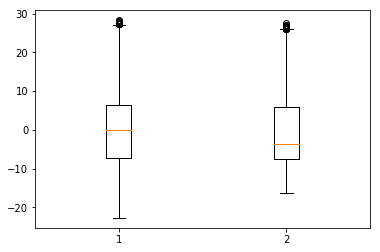

In [15]:
#%matplotlib inline
plt.figure()
plt.boxplot((naive1,trained1));


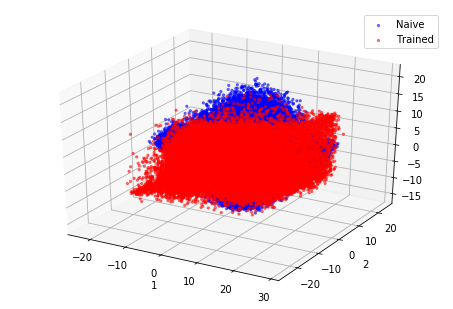

In [16]:
#%matplotlib notebook
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(naive1,naive2,naive3,c='b',marker='.',alpha=.5,label='Naive')
ax.scatter(trained1,trained2,trained3,c='r',marker='.',alpha=.5,label='Trained')
plt.xlabel('1')
plt.ylabel('2')
#plt.zlabel('3')
#plt.xlim([7,8])
# plt.ylim([0,90])
plt.legend();

(-0.1, 0.1)

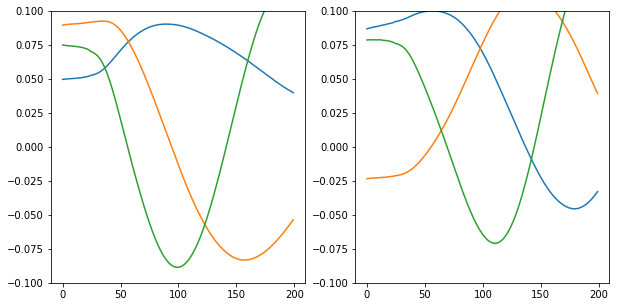

In [17]:
fig=plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.gca().set_ylim([-.1,.1])
i=3
plt.plot(data0.Wt.T[:,:i]);
plt.subplot(1,2,2)
plt.plot(data1.Wt.T[:,:i]);
plt.gca().set_ylim([-.1,.1])

0


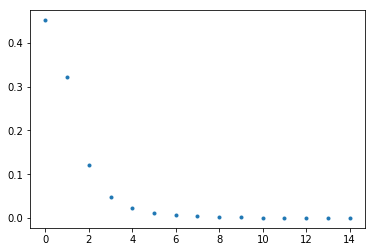

In [18]:
#Traj=Traj.T
print(np.max(np.sum(np.isnan(Traj),axis=1)))
data=mlab.PCA(Traj)
plt.plot(data.s[:15]/np.sum(data.s[:15]),'.')

PCA on whole data and then display only first and last sessions

0


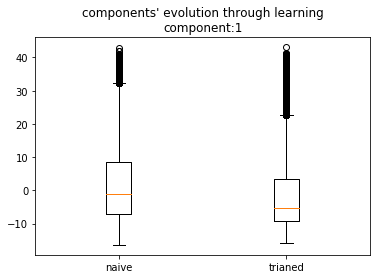

In [2]:
def position_based_trajectory2(root,animalList,SESSION_LIMIT,MAX_L):
    traj=[]
    ID=[]
    for animal in  animalList:
        sessionDict=batch_get_session_list(root,[animal],profile=AnimalProfile)
        tmp1=sorted(sessionDict['Sessions'])[:abs(SESSION_LIMIT)]
        tmp2=sorted(sessionDict['Sessions'])[-abs(SESSION_LIMIT):]

        for session in sorted(sessionDict['Sessions']):
            picklePath=os.path.join(root,animal,'Experiments',session,'Analysis','preprocesseddata_binsize250ms_.p')
            try:
                with open(picklePath,'rb') as f:
                    data=pickle.load(f)
                traj.extend([data['position'][i] for i in data['position']])
                if session in tmp1:
                    ID.extend(['naive' for i in data['position']])
                elif session in tmp2:
                    ID.extend(['trained' for i in data['position']])
                else:
                    ID.extend(['blah' for i in data['position']])

            except:pass
    Traj=np.ones((MAX_L,len(traj)))*np.nan

    for i,pos in enumerate(traj):
        Traj[:min(len(pos),MAX_L),i]=pos[:min(len(pos),MAX_L)]
        if len(pos) < MAX_L:
            Traj[np.isnan(Traj[:,i]),i]=Traj[np.where(np.isnan(Traj[:,i]))[0][0]-1,i]
    
    return Traj,ID

AnimalProfile={'Type':'Good',
     'rewardType':'Progressive',
     'initialSpeed':['10'],
     'Speed':['10'],
     'Tag':'Control'
              }

animalList=batch_get_animal_list(root,AnimalProfile)

SESSION_LIMIT=5
MAX_L        =375
COMPONENT=0

Traj,ID=position_based_trajectory2(root,animalList,SESSION_LIMIT,MAX_L)
Traj=Traj.T
print(np.max(np.sum(np.isnan(Traj),axis=1)))
data=mlab.PCA(Traj)

plt.boxplot((data.Y[np.array(ID)=='naive',COMPONENT],data.Y[np.array(ID)=='trained',COMPONENT]),labels=['naive','trianed']);
plt.gca().set_title('components\' evolution through learning\ncomponent:%s'%str(COMPONENT+1));

In [3]:
COMPONENT=10
scipy.stats.kruskal(data.Y[np.array(ID)=='naive',COMPONENT],data.Y[np.array(ID)=='trained',COMPONENT])

KruskalResult(statistic=1.3978746398934163, pvalue=0.23707974951786437)

In [ ]:
fig=plt.figure(figsize=(10,5))
i=3
plt.subplot(1,2,1)
plt.plot(data.Wt.T[:,:i]);
plt.subplot(1,2,2)
plt.plot(data.Wt.T[:,:i]);